In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [31]:
pd.set_option('display.max_columns', None)

In [32]:
df = pd.read_csv("../datasets/train.csv")

/var/folders/ln/s46v4gtx1nx56rygx6_xcmkw0000gn/T/ipykernel_2810/3427624996.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../datasets/train.csv")


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 78 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

In [34]:
# List of columns to drop
columns_to_drop = ["Tranc_YearMonth", "storey_range", "address", "mid_storey", "full_flat_type"]

# Drop the specified columns
df.drop(columns_to_drop, axis = 1, inplace = True)

In [35]:
# Drop rows where mall_nearest_distance is null
df.dropna(subset = "Mall_Nearest_Distance", inplace = True)

# Keep the rows where 'mall_nearest_distance' is not 0
df = df[df["Mall_Nearest_Distance"] != 0]

In [36]:
# Replace boolean columns

# List of columns to replace
columns_to_replace = ["residential", "commercial", "market_hawker", "multistorey_carpark", "precinct_pavilion"]

# Replace 'N' with 0, and 'Y' with 1
df[columns_to_replace] = df[columns_to_replace].replace(["N", "Y"], [0, 1])

In [37]:
# Impute null values in specific columns with 0

# List of columns to impute
columns_to_impute = ["Mall_Within_500m", "Mall_Within_1km","Mall_Within_2km", "Hawker_Within_500m", "Hawker_Within_1km", "Hawker_Within_2km"]

# Impute null values with 0 in the specified columns
df[columns_to_impute] = df[columns_to_impute].fillna(value = 0, axis = 1)


In [38]:
# Convert all column names to be lowercase
df.columns = df.columns.str.lower()

In [39]:
# To drop rows where the postal is "NIL" and convert the postal code to be integer type.
df = df[df["postal"] != "NIL"]
df['postal'] = df["postal"].astype("int")

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149742 entries, 0 to 150633
Data columns (total 73 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         149742 non-null  int64  
 1   town                       149742 non-null  object 
 2   flat_type                  149742 non-null  object 
 3   block                      149742 non-null  object 
 4   street_name                149742 non-null  object 
 5   floor_area_sqm             149742 non-null  float64
 6   flat_model                 149742 non-null  object 
 7   lease_commence_date        149742 non-null  int64  
 8   resale_price               149742 non-null  float64
 9   tranc_year                 149742 non-null  int64  
 10  tranc_month                149742 non-null  int64  
 11  lower                      149742 non-null  int64  
 12  upper                      149742 non-null  int64  
 13  mid                        14

In [41]:
#Including district code

df["district_code"] = df["postal"].astype("str").str[:2]
df.head()

,id,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,district_code
0,88471,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,90.0,Model A,2006,680000.0,2016,5,10,12,11,968.760,701.928238,15,25,2005,1,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,38
1,122598,BISHAN,5 ROOM,153,BISHAN ST 13,130.0,Improved,1987,665000.0,2012,7,7,9,8,1399.320,475.230826,34,9,1987,1,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,57
2,170897,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,144.0,Apartment,1997,838000.0,2013,7,13,15,14,1550.016,540.639580,24,16,1996,1,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,65
3,86070,BISHAN,4 ROOM,232,BISHAN ST 22,103.0,Model A,1992,550000.0,2012,4,1,5,3,1108.692,496.080066,29,11,1990,1,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,57
4,153632,YISHUN,4 ROOM,876,YISHUN ST 81,83.0,Simplified,1987,298000.0,2017,12,1,3,2,893.412,333.552717,34,4,1987,1,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,76


In [42]:
# Summary statistics of numeric variables in our cleaned dataset.
df.describe()

,id,floor_area_sqm,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
count,149742.000000,149742.000000,149742.000000,1.497420e+05,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.0,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.00000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000,149742.000000
mean,92855.241362,97.222615,1992.315576,4.486662e+05,2016.466763,6.586923,7.226523,9.299822,8.263173,1046.504227,433.489815,28.684424,15.108012,1990.788677,1.0,0.191890,0.000100,0.000280,0.000755,124.599411,0.13964,1.766358,39.293558,49.921846,26.296637,5.975999,0.024115,0.431235,0.063990,0.626090,0.059603,0.000341,553581.399100,1.366179,103.839328,664.426314,0.489883,1.796223,5.197186,1167.571392,0.490397,1.409912,3.802580,48.704432,58.310133,764.154674,0.545071,0.261309,1.365614,103.839342,115.201164,1.366187,103.839308,394.967802,55.301031,0.113235,1.366217,103.839046,507.652819,210.125095,0.031902,1.365940,103.839274
std,53639.094344,24.441882,12.042246,1.432380e+05,2.742201,3.339657,5.489519,5.481949,5.482516,263.092422,104.177214,12.042246,6.195127,12.103972,0.0,0.393788,0.010008,0.016745,0.027460,58.317803,5.96565,11.688068,68.868183,45.240904,33.491971,19.183276,1.138859,5.212640,2.034205,11.226896,0.669194,0.024377,187513.206992,0.042871,0.072514,368.678327,0.729694,1.421096,3.470181,1071.120967,0.767238,1.711613,4.009482,19.152557,55.515556,429.109023,0.497966,0.439350,0.042577,0.072591,55.568108,0.042886,0.072527,234.207186,17.879847,0.316881,0.042692,0.072642,308.813798,20.005456,0.175739,0.042622,0.072640
min,1.000000,31.000000,1966.000000,1.500000e+05,2012.000000,1.000000,1.000000,3.000000,2.000000,333.684000,205.108901,3.000000,2.000000,1949.000000,1.0,0.000000,0.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50004.000000,1.270380,103.685228,34.265581,0.000000,0.000000,0.000000,1.873295,0.000000,0.000000,0.000000,0.000000,0.000000,21.971410,0.000000,0.000000,1.265982,103.697143,9.001285,1.270759,103.684206,45.668324,20.000000,0.000000,1.274962,103.687724,38.913475,188.000000,0.000000,1.276029,103.687207
25%,46233.250000,75.000000,1984.000000,3.460000e+05,2014.000000,4.000000,4.000000,6.000000,5.000000,807.300000,364.676062,20.000000,12.000000,1983.000000,1.0,0.000000,0.000000,0.000000,0.000000,90.000000,0.00000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,470765.000000,1.336285,1

[Text(0.5, 1.0, 'Distribution of resale price')]

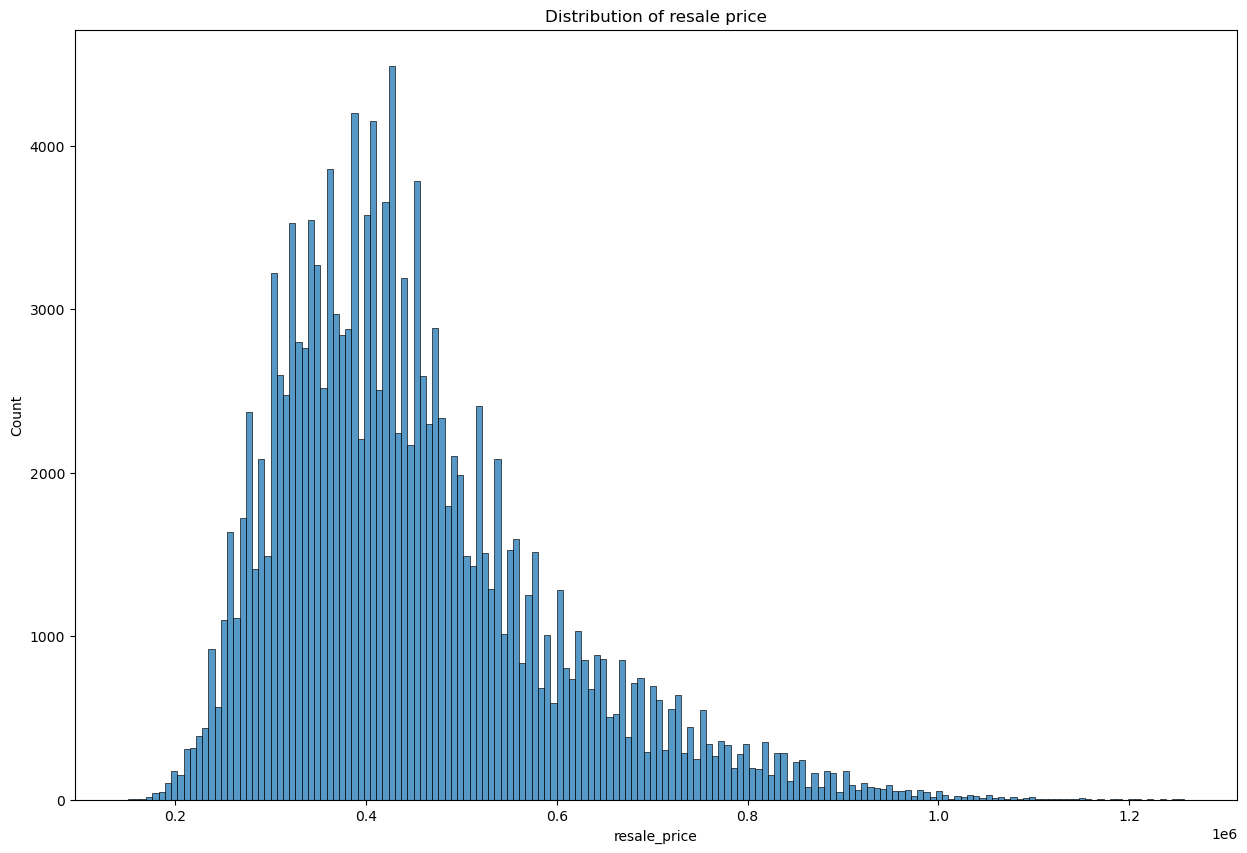

In [43]:
plt.figure(figsize=(15,10))
sns.histplot(data=df,x="resale_price").set(title="Distribution of resale price")
# While the distribution of resale price (i.e. response variable) is skewed to the right, 
# with the large sample size of 149742, we can still apply linear regression to model the relationship between
# our response variable and the features. 

<Axes: xlabel='resale_price'>

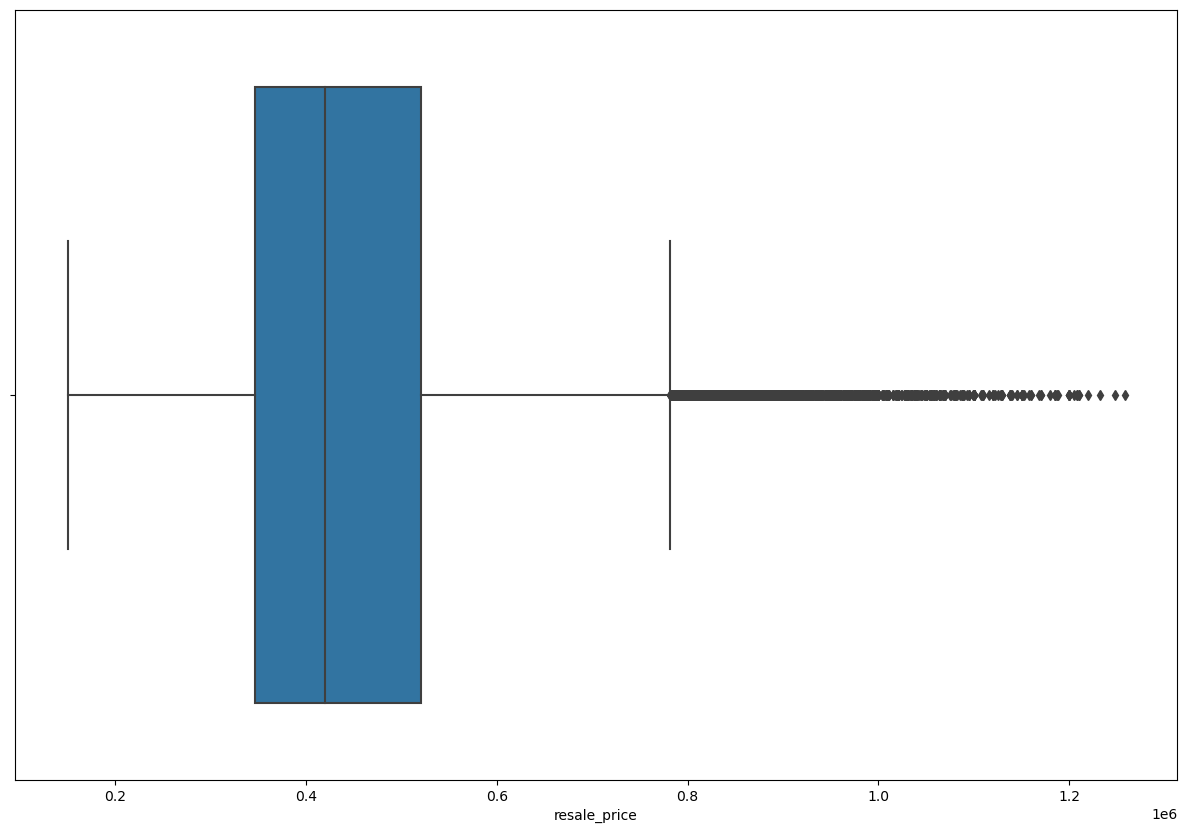

In [44]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="resale_price")
# There is presence of outliers for our response variable. 

[Text(0.5, 1.0, 'Distribution of resale price by towns')]

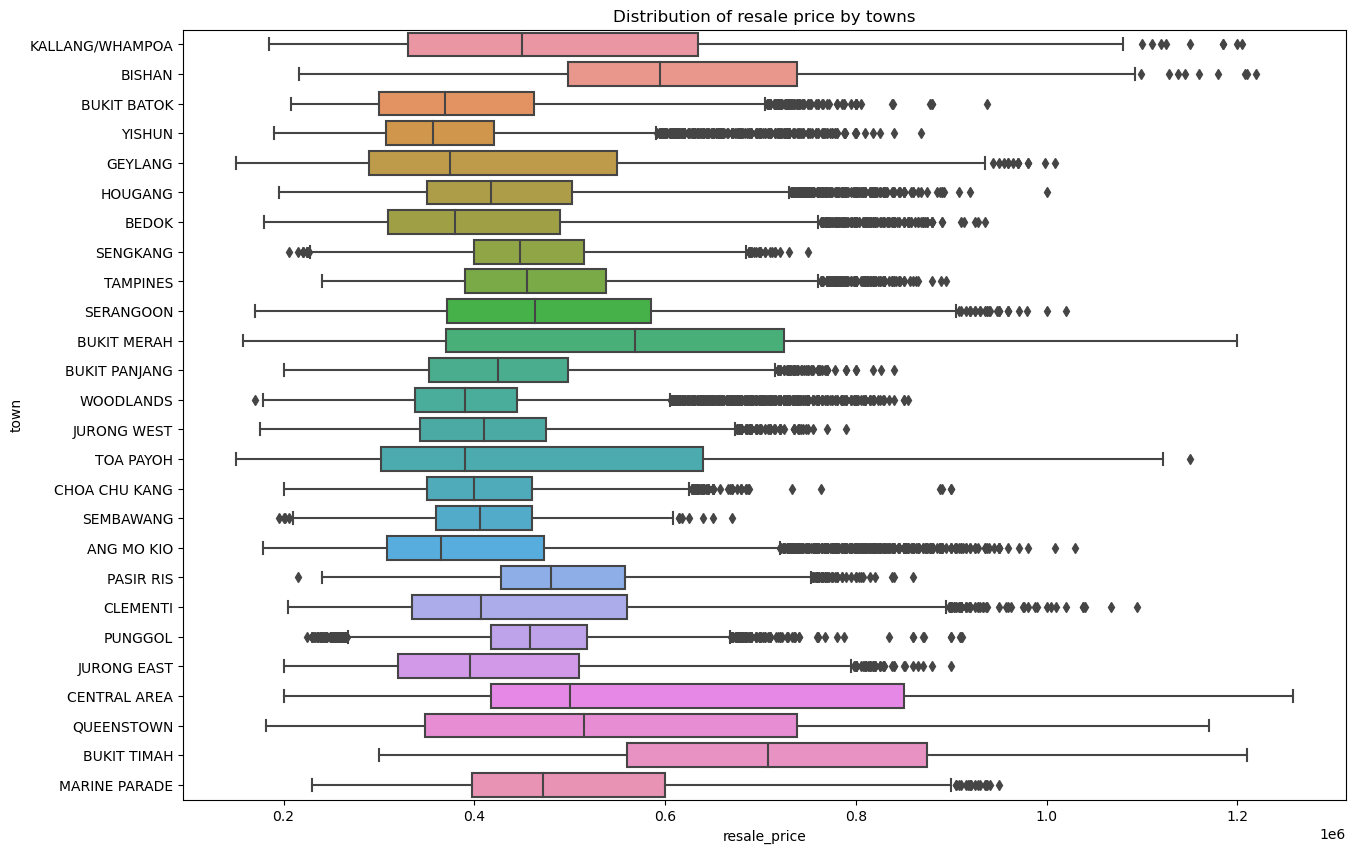

In [45]:
# Plotting the town against the resale price to see if there are differences in the distributions.
plt.figure(figsize=(15,10))
sns.boxplot(data=df, x="resale_price",y="town").set(title="Distribution of resale price by towns")
# Based on the boxplots, there seem to be differences in the median resale prices. We can consider grouping the towns based on its regions.

In [46]:
region_data = {'town':['KALLANG/WHAMPOA','BISHAN','BUKIT BATOK','YISHUN','GEYLANG','HOUGANG','BEDOK','SENGKANG',
                      'TAMPINES','SERANGOON','BUKIT MERAH','BUKIT PANJANG','WOODLANDS','JURONG WEST','TOA PAYOH',
                      'CHOA CHU KANG','SEMBAWANG','ANG MO KIO','PASIR RIS','CLEMENTI','PUNGGOL','JURONG EAST',
                      'CENTRAL AREA','QUEENSTOWN','BUKIT TIMAH','MARINE PARADE'],
              'region':['CENTRAL','CENTRAL','WEST','NORTH','CENTRAL','NORTHEAST','EAST','NORTHEAST',
                       'EAST','NORTHEAST','CENTRAL','WEST','NORTH','WEST','CENTRAL',
                       'WEST','NORTH','CENTRAL','EAST','WEST','NORTHEAST','WEST',
                       'CENTRAL','CENTRAL','CENTRAL','CENTRAL']}

region_df = pd.DataFrame(region_data)
region_df

,town,region
0,KALLANG/WHAMPOA,CENTRAL
1,BISHAN,CENTRAL
2,BUKIT BATOK,WEST
3,YISHUN,NORTH
4,GEYLANG,CENTRAL
5,HOUGANG,NORTHEAST
6,BEDOK,EAST
7,SENGKANG,NORTHEAST
8,TAMPINES,EAST
9,SERANGOON,NORTHEAST


In [47]:
df_final = pd.merge(df,region_df,how='left',on="town")
df_final.head()

,id,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,postal,latitude,longitude,planning_area,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,mrt_name,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_name,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,pri_sch_name,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude,district_code,region
0,88471,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,90.0,Model A,2006,680000.0,2016,5,10,12,11,968.760,701.928238,15,25,2005,1,0,0,0,0,142,0,0,0,96,46,0,0,0,0,0,0,0,382003,1.314299,103.872828,Kallang,1094.090418,0.0,0.0,7.0,154.753357,1.0,3.0,13.0,84,60,330.083069,Kallang,0,0,1.311540,103.871731,29.427395,Blk 3B,1.314433,103.872600,1138.633422,Geylang Methodist School,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504,38,CENTRAL
1,122598,BISHAN,5 ROOM,153,BISHAN ST 13,130.0,Improved,1987,665000.0,2012,7,7,9,8,1399.320,475.230826,34,9,1987,1,0,0,0,0,112,0,0,0,56,56,0,0,0,0,0,0,0,570153,1.346086,103.855078,Bishan,866.941448,0.0,1.0,3.0,640.151925,0.0,1.0,7.0,80,77,903.659703,Bishan,1,1,1.350580,103.848305,58.207761,BLK 151A MKT,1.345659,103.855381,415.607357,Kuo Chuan Presbyterian Primary School,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892,57,CENTRAL
2,170897,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,144.0,Apartment,1997,838000.0,2013,7,13,15,14,1550.016,540.639580,24,16,1996,1,0,0,0,0,90,0,0,0,0,30,60,0,0,0,0,0,0,651289,1.343867,103.760535,Bukit Batok,1459.579948,0.0,0.0,4.0,1762.082341,0.0,0.0,1.0,84,95,1334.251197,Bukit Batok,1,0,1.349561,103.749970,214.747860,Blk 289E,1.344064,103.758613,498.849039,Keming Primary School,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013,65,WEST
3,86070,BISHAN,4 ROOM,232,BISHAN ST 22,103.0,Model A,1992,550000.0,2012,4,1,5,3,1108.692,496.080066,29,11,1990,1,1,0,0,0,75,0,0,0,68,7,0,0,0,0,0,0,0,570232,1.358245,103.845504,Bishan,950.175199,0.0,1.0,4.0,726.215262,0.0,1.0,9.0,32,86,907.453484,Bishan,1,1,1.350580,103.848305,43.396521,Opp Bishan Nth Shop Mall,1.358045,103.845169,389.515528,Catholic High School,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934,57,CENTRAL
4,153632,YISHUN,4 ROOM,876,YISHUN ST 81,83.0,Simplified,1987,298000.0,2017,12,1,3,2,893.412,333.552717,34,4,1987,1,0,0,0,0,48,0,0,0,30,18,0,0,0,0,0,0,0,760876,1.414745,103.835532,Yishun,729.771895,0.0,1.0,2.0,1540.151439,0.0,0.0,1.0,45,0,412.343032,Khatib,0,0,1.417131,103.832692,129.422752,Blk 873,1.415424,103.836477,401.200584,Naval Base Primary School,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335,76,NORTH


[Text(0.5, 1.0, 'Distribution of resale price by regions')]

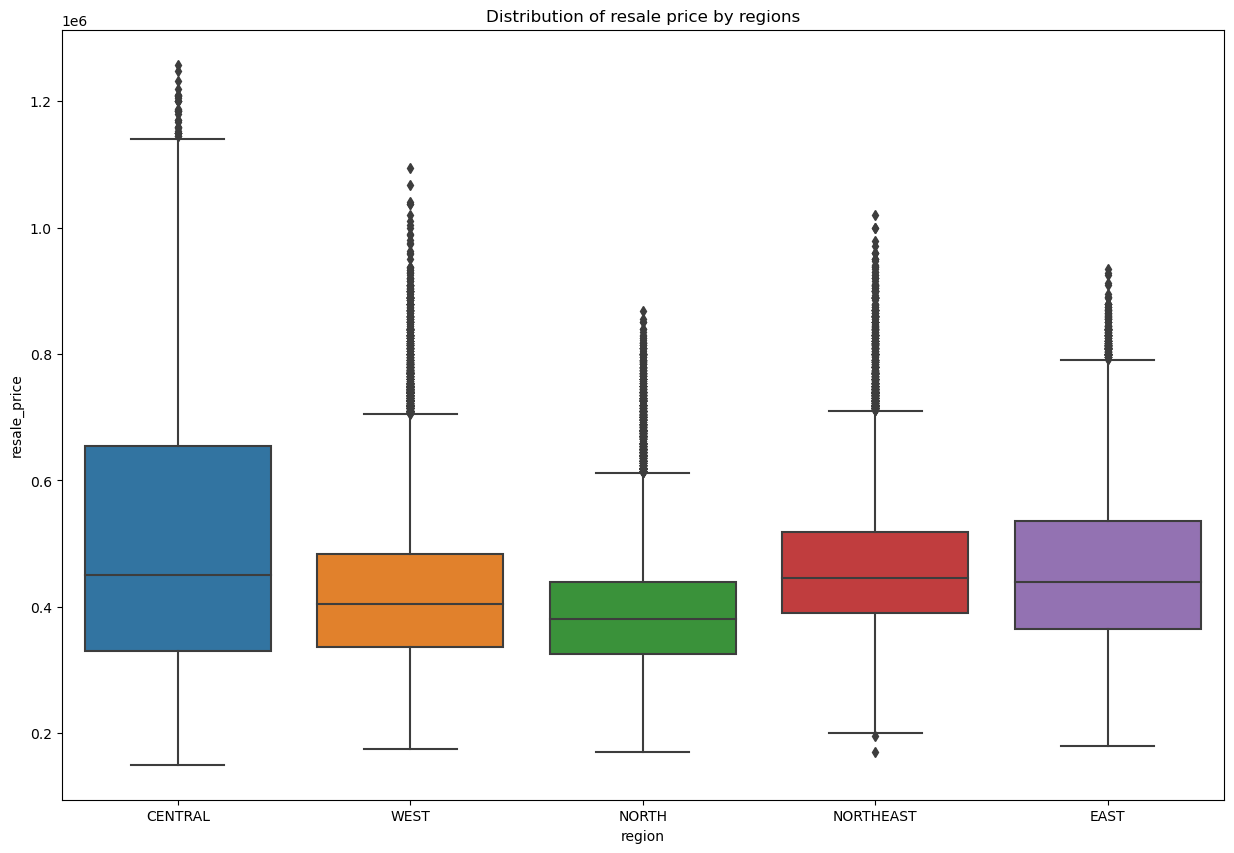

In [48]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_final, x="region",y="resale_price").set(title="Distribution of resale price by regions")

[Text(0.5, 1.0, 'Distribution of resale price by flat models')]

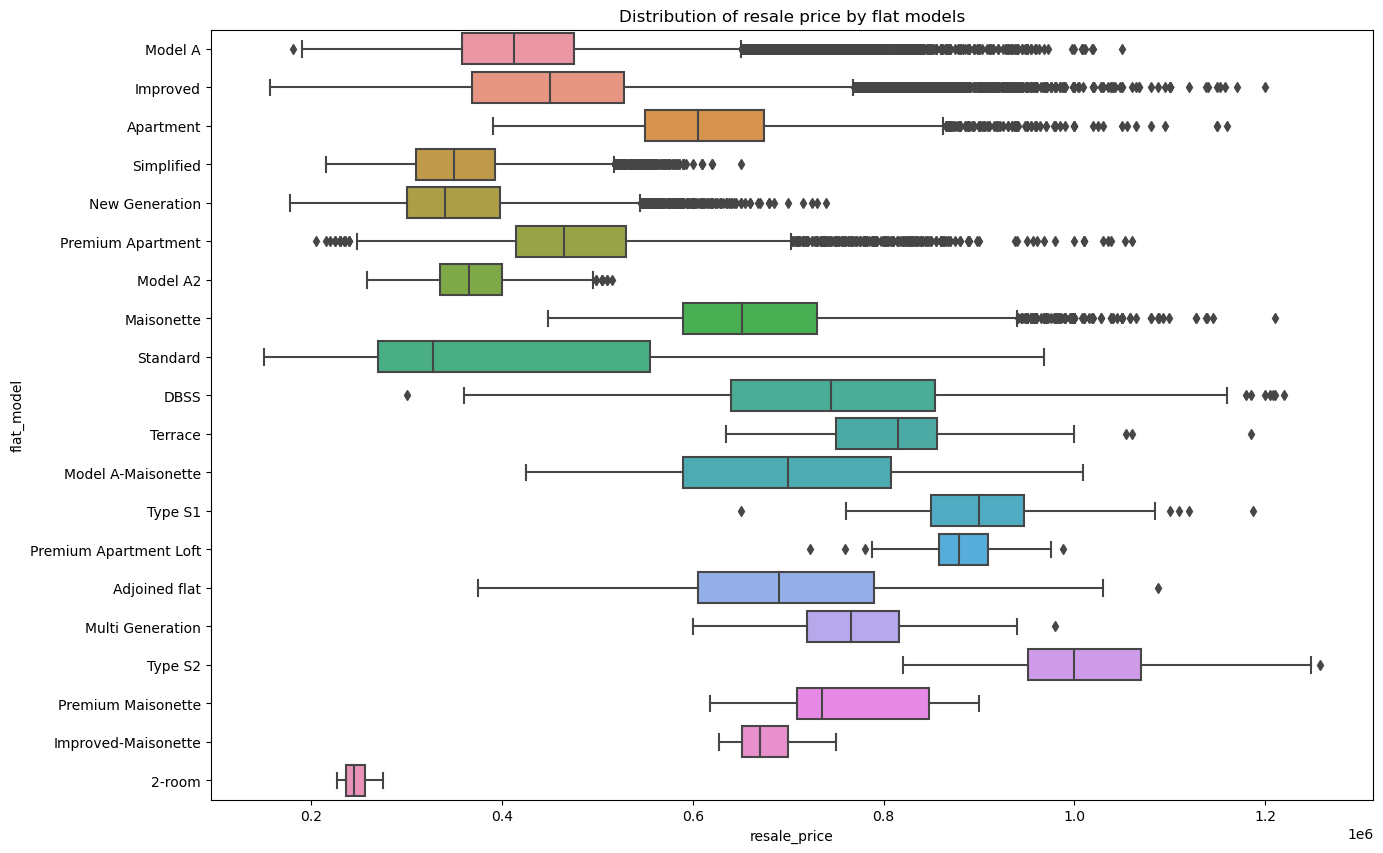

In [49]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df_final,x="resale_price",y="flat_model"). set(title = "Distribution of resale price by flat models")

[Text(0.5, 1.0, 'Relationhip between resale price and floor area (in feet)')]

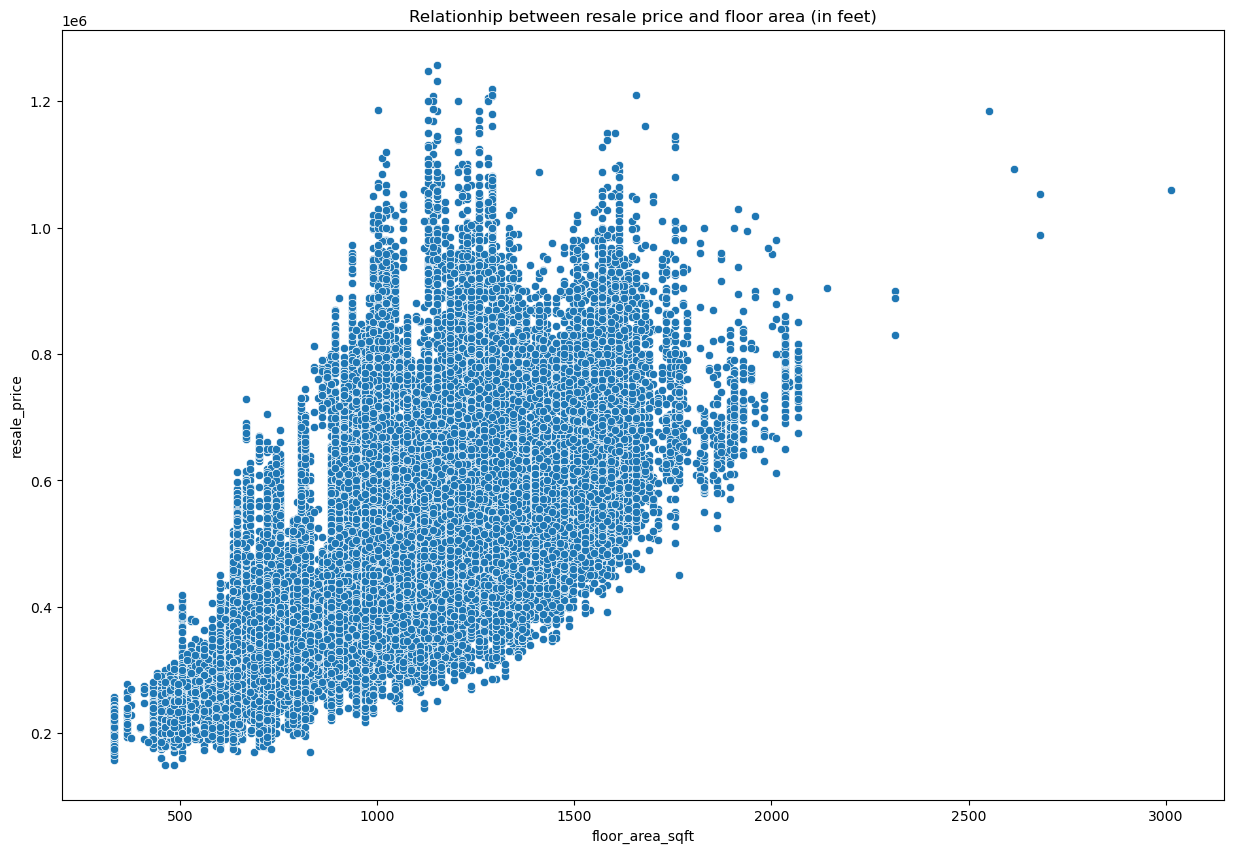

In [50]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_final,x="floor_area_sqft",y="resale_price").set(title="Relationhip between resale price and floor area (in feet)")

[Text(0.5, 1.0, 'Trend line of resale prices by the transacted years for the various flat types')]

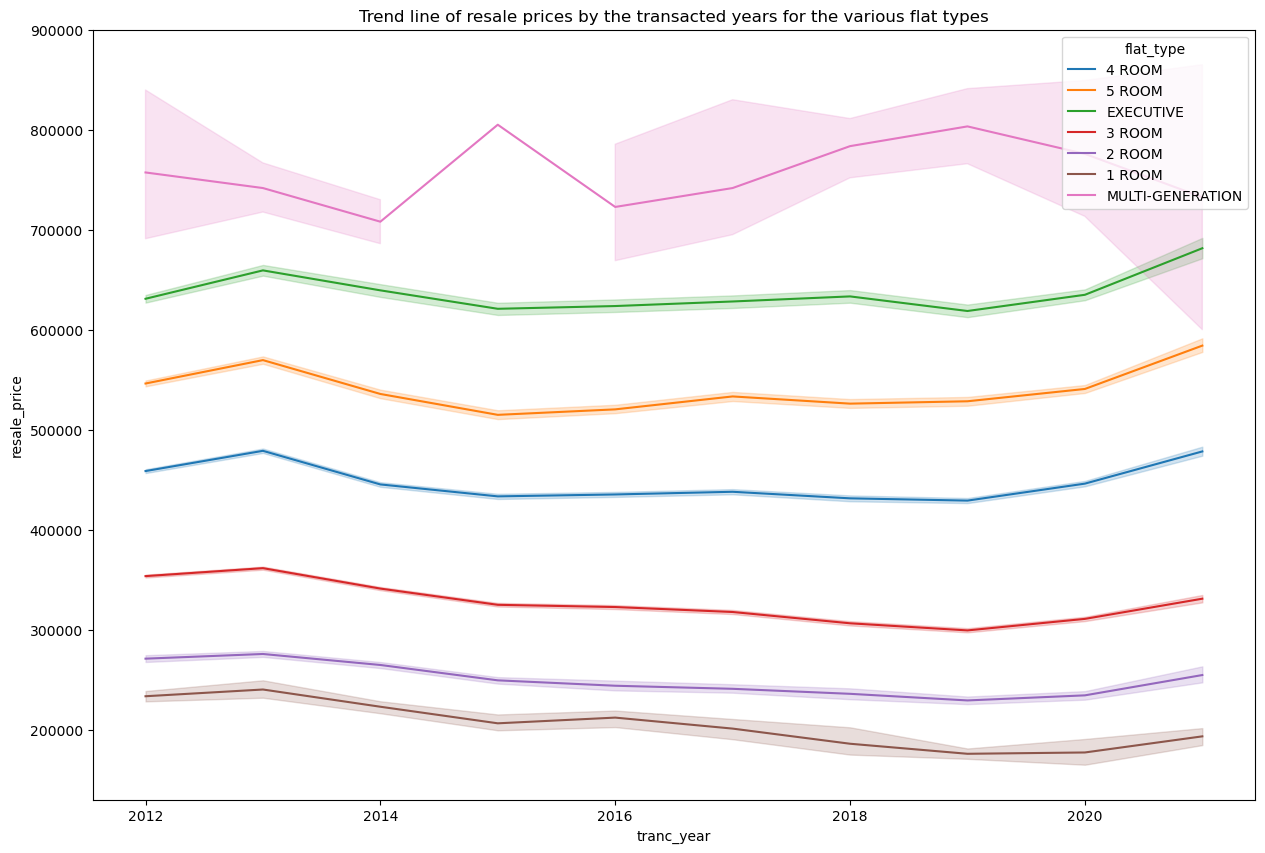

In [51]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_final,x="tranc_year",y="resale_price",hue="flat_type").set(title="Trend line of resale prices by the transacted years for the various flat types")

[Text(0.5, 1.0, 'Trend line of resale prices based on lease commence date for the various flat types')]

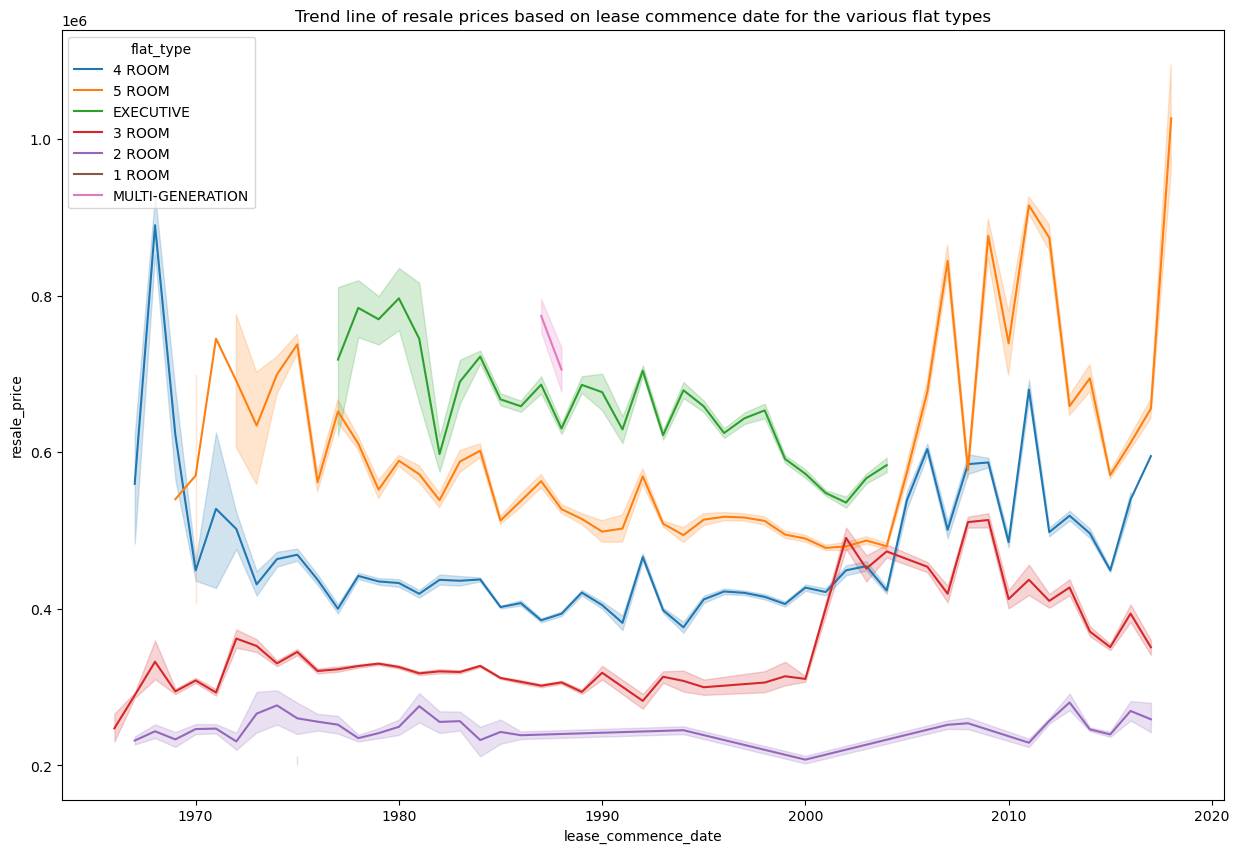

In [52]:
plt.figure(figsize=(15,10))
sns.lineplot(data=df_final,x="lease_commence_date",y="resale_price",hue="flat_type").set(title="Trend line of resale prices based on lease commence date for the various flat types")

In [58]:
#Create new features: 
# 1 is called the relative_storey to each flat.
df_final['relative_storey'] = df_final['mid']/df_final['max_floor_lvl']

#The following did not do much in improving the model. 
#df_final['mall_nearest_distance_log'] = np.log(df_final["mall_nearest_distance"])
#df_final['hawker_nearest_distance_log'] = np.log(df_final["hawker_nearest_distance"])
#df_final['mrt_nearest_distance_log'] = np.log(df_final["mrt_nearest_distance"])

In [56]:
# Calculate the distance between each resale flat and CBD (Raffles Place mrt)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of the earth in km
    dLat = math.radians(lat2 - lat1)
    dLon = math.radians(lon2 - lon1)
    a = math.sin(dLat / 2) * math.sin(dLat / 2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dLon / 2) * math.sin(dLon / 2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = R * c  # Distance in km
    return d

# Distance between each resale flat and Raffles Place mrt in km
df_final['dist_CBD'] = df_final.apply(lambda row: haversine(row['latitude'], row['longitude'], 1.283931, 103.851461), axis=1)

<Axes: >

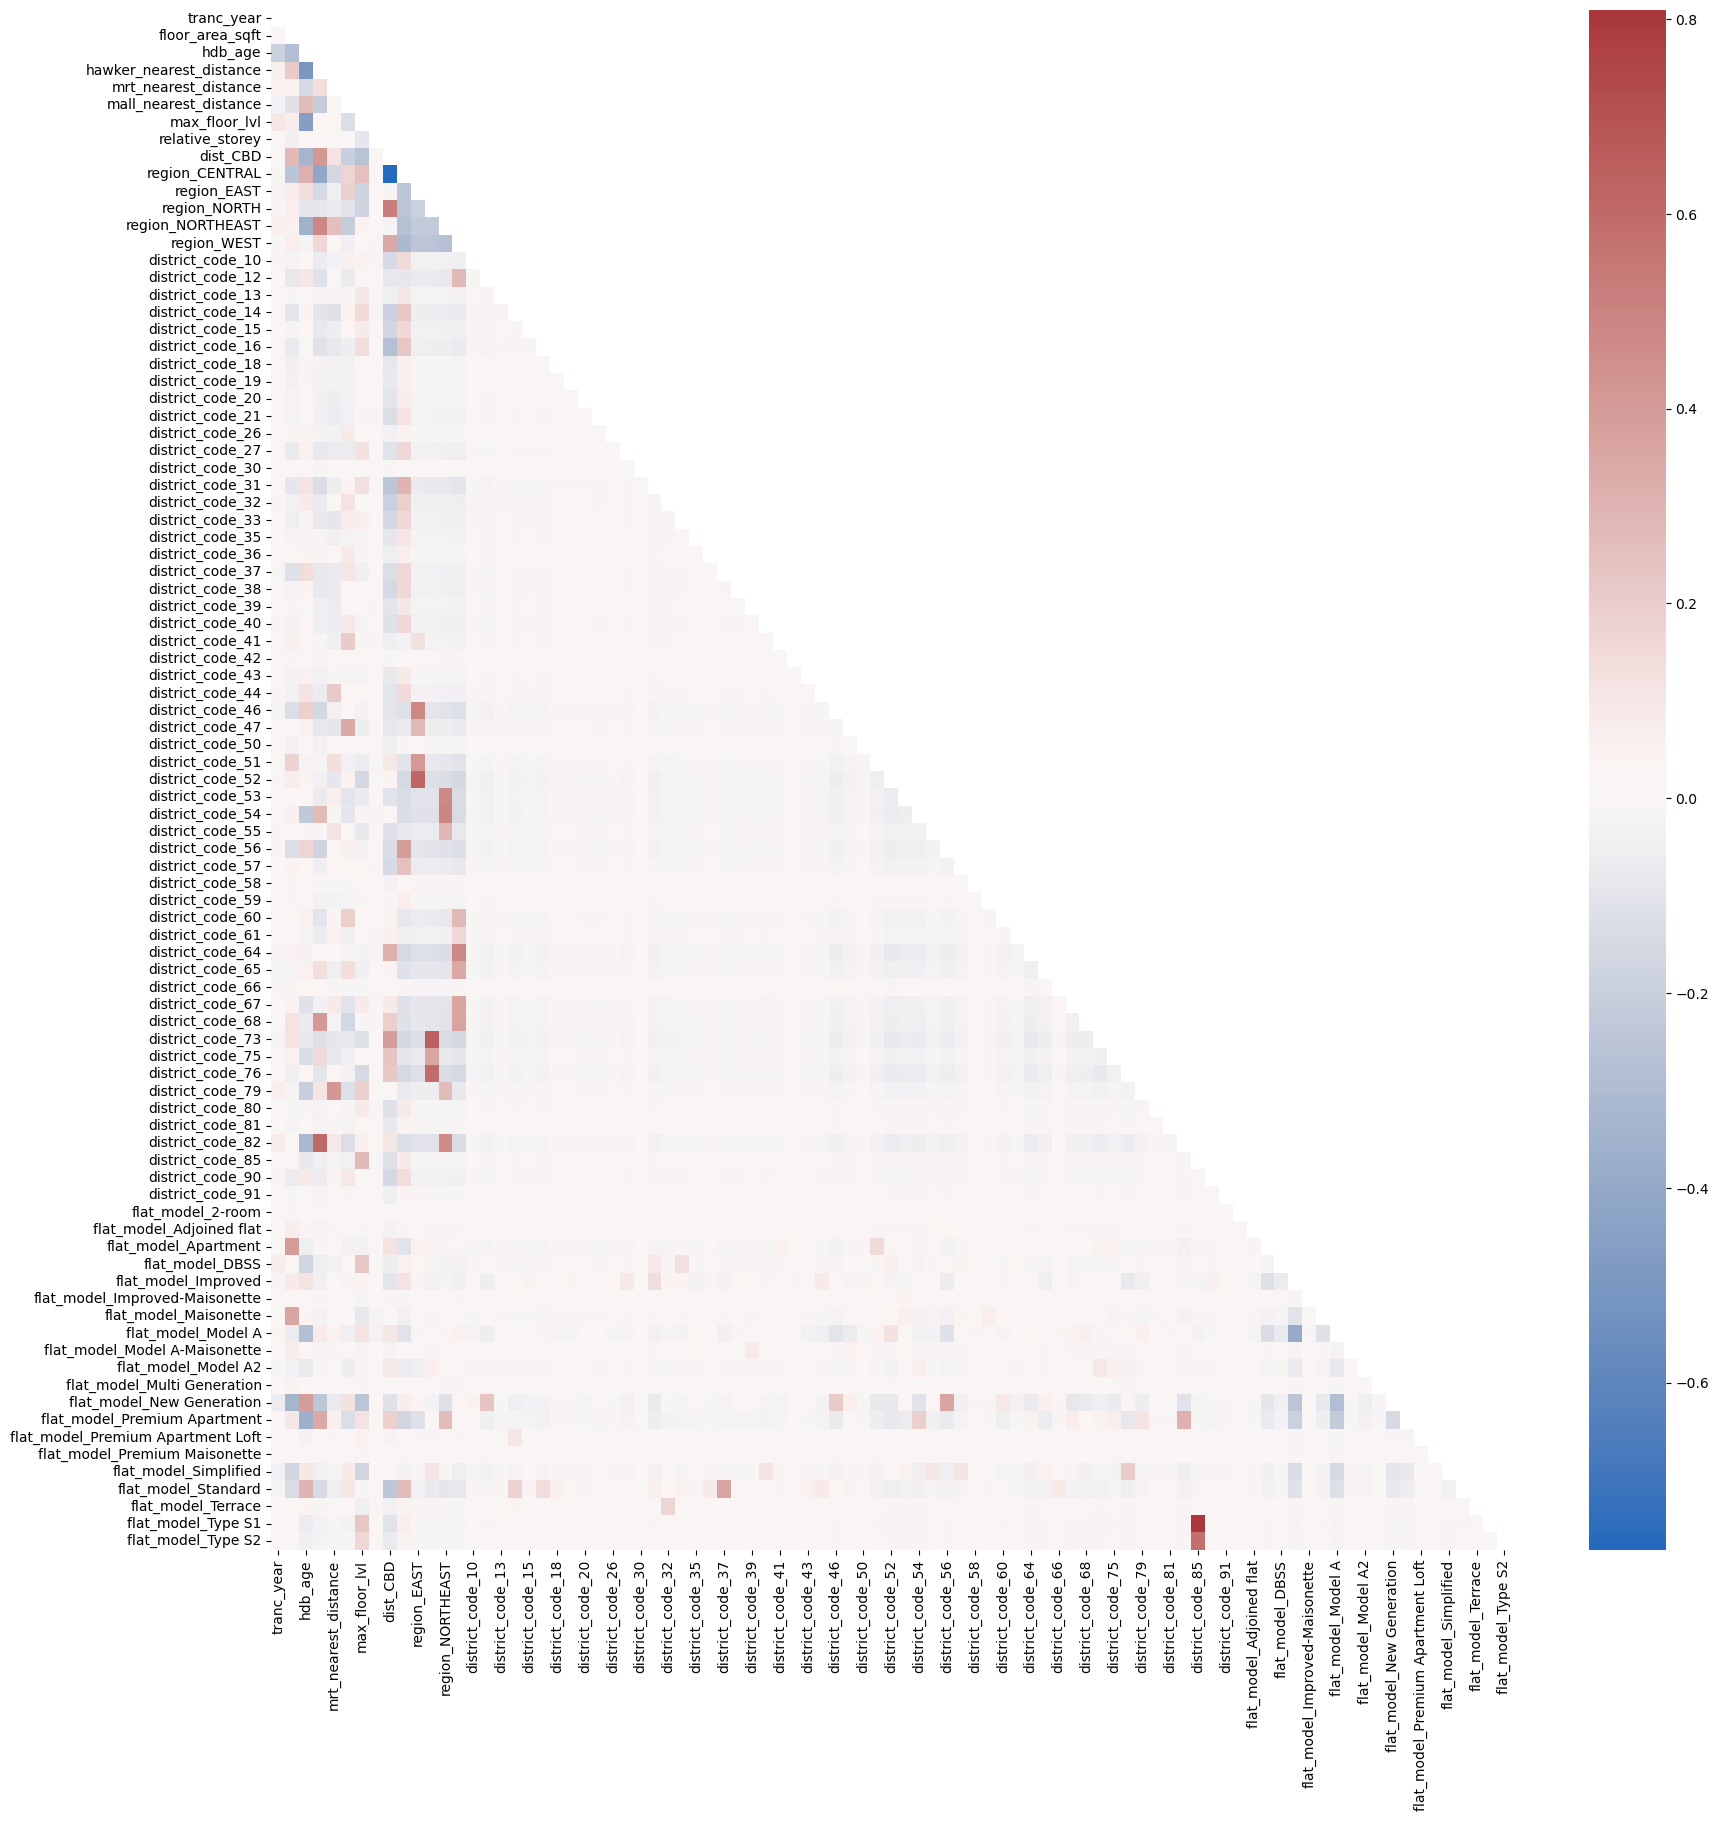

In [59]:
#The following codes are for feature selection and prediction with a linear regression model.
X = df_final[["tranc_year","floor_area_sqft","hdb_age","flat_model","region","hawker_nearest_distance","mrt_nearest_distance","mall_nearest_distance","max_floor_lvl","district_code","relative_storey","dist_CBD"]]
X_dummies = pd.get_dummies(X[['region',"district_code","flat_model"]])
full_X = pd.merge(X, X_dummies,left_index = True, right_index = True)
full_X = full_X.drop(columns = ['region',"district_code","flat_model"]) #This is to drop the original categorical which is represented by the dummy variables.

y = df_final['resale_price']

#The following code for the heatmap is to sieve out for any possible collinearity in the features.
#From the heatmap, region_CENTRAL (-0.53) and region_NORTH (0.73) seems to have strong correlation with latitude.
#From the heatmap, hawker_nearest_distance and lease commence date have correlation of 0.5.
plt.figure(figsize= (20,20))
mask = np.zeros_like(full_X.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(full_X.corr(),mask=mask, cmap = "vlag")

In [60]:
full_X.corr()

,tranc_year,floor_area_sqft,hdb_age,hawker_nearest_distance,mrt_nearest_distance,mall_nearest_distance,max_floor_lvl,relative_storey,dist_CBD,region_CENTRAL,region_EAST,region_NORTH,region_NORTHEAST,region_WEST,district_code_10,district_code_12,district_code_13,district_code_14,district_code_15,district_code_16,district_code_18,district_code_19,district_code_20,district_code_21,district_code_26,district_code_27,district_code_30,district_code_31,district_code_32,district_code_33,district_code_35,district_code_36,district_code_37,district_code_38,district_code_39,district_code_40,district_code_41,district_code_42,district_code_43,district_code_44,district_code_46,district_code_47,district_code_50,district_code_51,district_code_52,district_code_53,district_code_54,district_code_55,district_code_56,district_code_57,district_code_58,district_code_59,district_code_60,district_code_61,district_code_64,district_code_65,district_code_66,district_code_67,district_code_68,district_code_73,district_code_75,district_code_76,district_code_79,district_code_80,district_code_81,district_code_82,district_code_85,district_code_90,district_code_91,flat_model_2-room,flat_model_Adjoined flat,flat_model_Apartment,flat_model_DBSS,flat_model_Improved,flat_model_Improved-Maisonette,flat_model_Maisonette,flat_model_Model A,flat_model_Model A-Maisonette,flat_model_Model A2,flat_model_Multi Generation,flat_model_New Generation,flat_model_Premium Apartment,flat_model_Premium Apartment Loft,flat_model_Premium Maisonette,flat_model_Simplified,flat_model_Standard,flat_model_Terrace,flat_model_Type S1,flat_model_Type S2
tranc_year,1.000000,0.023473,-0.191934,0.067662,0.054026,-0.036431,0.103439,0.005772,0.001662,-0.012411,-0.019531,-0.015148,0.064984,-0.017813,-0.006970,-0.005614,0.002078,-0.001778,-0.004362,0.006260,-0.003099,-0.001730,0.001142,-0.003548,0.002459,0.004263,0.001887,-0.002153,-0.009395,0.004995,0.001564,-0.004681,-0.012480,-0.005083,0.000380,-0.006600,0.000500,-0.001810,0.001396,-0.007590,-0.019376,-0.005047,-0.001586,-0.004114,-0.007717,-0.003018,0.005082,-0.008612,-0.009253,0.006614,0.001342,0.006108,-0.005183,0.003399,-0.027033,-0.017494,-0.008158,0.021832,-0.001518,-0.027880,-0.003515,0.009009,0.070612,-0.003906,-0.003686,0.078477,0.012956,-0.008680,-0.003420,0.005246,0.005127,-0.003337,0.079744,-0.011079,0.000461,0.006719,0.049328,0.003771,-0.013356,0.001998,-0.062870,0.029888,0.021549,0.002433,-0.039520,-0.023946,-0.000323,0.009218,0.009346
floor_area_sqft,0.023473,1.000000,-0.289145,0.208631,0.053782,-0.105844,0.076965,-0.043537,0.280932,-0.257386,0.079929,0.068607,0.061156,0.070304,-0.025612,-0.081301,-0.014425,-0.092342,-0.018938,-0.071761,-0.044553,-0.038455,-0.026260,-0.026327,-0.013245,-0.067645,-0.004421,-0.089272,-0.042738,-0.053863,-0.021357,-0.005150,-0.116727,-0.024986,-0.005873,-0.033369,0.066966,-0.008161,-0.034891,-0.040093,-0.125578,-0.002723,-0.041816,0.179291,0.078347,0.028492,0.066450,0.022576,-0.123957,0.053333,-0.017704,0.042072,-0.004137,0.011703,0.058477,-0.027933,-0.014597,0.050186,0.115903,0.115010,0.056431,-0.054141,-0.022360,-0.014125,-0.020202,0.009165,0.002418,-0.064694,-0.015695,-0.009827,0.078242,0.391393,0.007198,0.091683,0.017775,0.359150,-0.064547,0.074881,-0.038726,0.050668,-0.338701,0.101253,0.011020,0.025899,-0.166803,-0.136488,0.012575,-0.004706,0.010613
hdb_age,-0.191934,-0.289145,1.000000,-0.501594,-0.152429,0.264473,-0.457208,0.033231,-0.333672,0.318293,0.134925,-0.096255,-0.351618,-0.022749,0.033721,0.102377,-0.004117,0.040194,0.032386,-0.003868,0.041294,0.039215,0.024514,0.006895,0.044068,0.057958,0.013787,0.117671,0.087984,0.043095,0.038118,0.045565,0.137879,0.048649,0.009730,0.021073,-0.005214,0.007195,0.059731,0.112918,0.186794,0.049992,0.036459,-0.028180,0.044017,0.024789,-0.233354,0.047004,0.170084,0.033104,0.019310,0.012920,0.058585,-0.027345,-0.032689,0.059574,0.034768,-0.106662,-0.072760,-0.081930,-0.132716,0.025466,-0.207178,-0.008014,0.025874,-0.320504,-0.077117,0.084060,0.017280,-0.0051

In [61]:

#poly = PolynomialFeatures(interaction_only=True,include_bias=False)
#X_poly = poly.fit_transform(full_X)
#X_poly_final = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(full_X.columns))
#X_train, X_test, y_train, y_test = train_test_split(X_poly_final, y, random_state=42)

#Scaling the features
#ss = StandardScaler()
#ss.fit(full_X)
#X_scaled = ss.transform(full_X)
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(full_X, y, random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
LR.predict(X_train)
LR.score(X_train,y_train)
print(f"Linear regression train performance:{LR.score(X_train,y_train)}")

LA = Lasso()
LA.fit(X_train,y_train)
LA.predict(X_train)
LA.score(X_train,y_train)
print(f"Lasso regression train performance: {LA.score(X_train,y_train)}")

RI = Ridge()
RI.fit(X_train,y_train)
RI.predict(X_train)
RI.score(X_train,y_train)
print(f"Ridge regression train performance: {RI.score(X_train,y_train)}")

Linear regression train performance:0.8867476279100179


/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.299e+14, tolerance: 2.306e+11
  model = cd_fast.enet_coordinate_descent(


Lasso regression train performance: 0.8867242319986742
Ridge regression train performance: 0.886736887733918


In [62]:
LR.score(X_test,y_test)
print(f"Linear regression test performance:{LR.score(X_test,y_test)}")
LA.score(X_test,y_test)
print(f"Lasso regression test performance: {LA.score(X_test,y_test)}")
RI.score(X_test,y_test)
print(f"Ridge regression test performance: {RI.score(X_test,y_test)}")

Linear regression test performance:0.8865543976703318
Lasso regression test performance: 0.88651440893735
Ridge regression test performance: 0.886538104040183


In [63]:
LR_CV = cross_val_score(LR, X_train, y_train, cv=5).mean()
print(f"Linear regression cross val performance: {cross_val_score(LR, X_train, y_train, cv=5).mean()}" )
LA_CV = cross_val_score(LA, X_train, y_train, cv=5).mean()
print(f"Lasso regression cross val performance: {cross_val_score(LA, X_train, y_train, cv=5).mean()}" )
RI_CV = cross_val_score(RI, X_train, y_train, cv=5).mean()
print(f"Ridge regression cross val performance:  {cross_val_score(RI, X_train, y_train, cv=5).mean()}" )

print(max(LR_CV,LA_CV,RI_CV))

Linear regression cross val performance: 0.8864749046765228


/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.046e+14, tolerance: 1.848e+11
  model = cd_fast.enet_coordinate_descent(
/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+14, tolerance: 1.847e+11
  model = cd_fast.enet_coordinate_descent(
/Users/licheng/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

Lasso regression cross val performance: 0.8864533306515778
Ridge regression cross val performance:  0.8864617162536179
0.8864749046765228


In [64]:
predictions_LR = LR.predict(X_train)
LR_RMSE = metrics.mean_squared_error(y_train, predictions_LR, squared=False)
print(f"The RMSE for Linear regression is: {LR_RMSE}")

predictions_LA = LA.predict(X_train)
LA_RMSE = metrics.mean_squared_error(y_train, predictions_LA, squared=False)
print(f"The RMSE for Lasso regression is: {LA_RMSE}")

predictions_RI = RI.predict(X_train)
RI_RMSE = metrics.mean_squared_error(y_train, predictions_RI, squared=False)
print(f"The RMSE for Ridge regression is: {RI_RMSE}")

The RMSE for Linear regression is: 48223.636474674044
The RMSE for Lasso regression is: 48228.61728717489
The RMSE for Ridge regression is: 48225.92304077233


In [388]:
#Total number of features used:
print(len(X.columns)+3)

#Total number of features (including dummy variables) used:
print(len(full_X.columns))

14
88


## =========================Working codes only============================

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,
    x_vars=["pri_sch_latitude", "sec_sch_latitude", "bus_stop_latitude","mrt_nearest_distance","mrt_latitude","year_completed","tranc_year","floor_area_sqft","lease_commence_date"],
    y_vars=["resale_price"])

In [47]:
X = df_final[["floor_area_sqft","latitude","lease_commence_date","region","total_dwelling_units","hawker_within_2km"]]
X_dummies = pd.get_dummies(X[['region']])
full_X = pd.merge(X, X_dummies,left_index = True, right_index = True)
full_X = full_X.drop(columns = ['region']) #This is to drop the original categorical which is represented by the dummy variables.
#X = df[["pri_sch_latitude", "sec_sch_latitude", "bus_stop_latitude","mrt_nearest_distance","mrt_latitude","3room_sold","year_completed","tranc_year","5room_sold","floor_area_sqft","total_dwelling_units","affiliation","cutoff_point","bus_interchange","lease_commence_date"]]
y = df_final['resale_price']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(full_X, y, random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
LR.predict(X_train)
LR.score(X_train,y_train)

0.7563370885987186

In [40]:
cross_val_score(LR,X,y,cv=5).mean()

0.739167569194226

In [41]:
LR.score(X_test,y_test)

0.7388427922558096

In [42]:
y_bar = y.mean() #this is the null model.

In [43]:
null_mse = np.mean((y-y_bar)**2)
null_mse

20517001790.233208

In [ ]:
y.median()

In [ ]:
plt.hist(y)

In [ ]:
new_df = df.columns(df["resale_price","planning_area","town","max_floor_level"],axis=1)

new_df.corr()

In [17]:
pd.set_option("display.max_columns", 80)
df.corr()

/var/folders/ln/s46v4gtx1nx56rygx6_xcmkw0000gn/T/ipykernel_49451/1992507199.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,floor_area_sqm,lease_commence_date,resale_price,tranc_year,tranc_month,lower,upper,mid,floor_area_sqft,price_per_sqft,hdb_age,max_floor_lvl,year_completed,residential,commercial,market_hawker,multistorey_carpark,precinct_pavilion,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,latitude,longitude,mall_nearest_distance,mall_within_500m,mall_within_1km,mall_within_2km,hawker_nearest_distance,hawker_within_500m,hawker_within_1km,hawker_within_2km,hawker_food_stalls,hawker_market_stalls,mrt_nearest_distance,bus_interchange,mrt_interchange,mrt_latitude,mrt_longitude,bus_stop_nearest_distance,bus_stop_latitude,bus_stop_longitude,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
id,1.000000,0.759452,0.376990,0.522643,0.060549,0.010081,0.057717,0.057573,0.057679,0.759452,-0.112093,-0.376990,0.131071,0.387860,NaN,-0.159265,-0.016644,0.003989,-0.019166,-0.474174,-0.040499,-0.245805,-0.669186,-0.015241,0.462650,0.417174,0.023452,-0.022463,-0.045050,-0.089930,-0.103809,0.010925,0.223285,0.010474,-0.130415,0.067284,0.038039,-0.029939,0.264198,-0.308927,-0.329106,-0.301057,-0.074349,-0.253948,0.078177,0.087261,0.122228,0.219336,0.008446,-0.002841,0.223429,0.010394,-0.109609,0.013049,-0.048230,0.226666,0.011384,-0.048965,-0.052566,-0.070405,0.220503,0.012802
floor_area_sqm,0.759452,1.000000,0.289145,0.656835,0.023473,0.003611,0.026171,0.026137,0.026170,1.000000,-0.181798,-0.289145,0.076965,0.294763,NaN,-0.137730,-0.015461,0.004465,-0.024339,-0.434615,-0.063420,-0.241283,-0.586280,-0.066966,0.390797,0.513122,0.043948,-0.049753,-0.059083,-0.113120,-0.110826,0.000433,0.214442,-0.012242,-0.105844,0.066720,0.040329,-0.062700,0.208631,-0.313587,-0.328759,-0.293476,-0.061870,-0.206932,0.053782,0.054053,0.076409,0.208230,-0.014051,0.007478,0.214562,-0.012348,-0.113280,-0.029265,-0.042056,0.216839,-0.009990,-0.062640,-0.078147,-0.084171,0.212891,-0.009253
lease_commence_date,0.376990,0.289145,1.000000,0.348430,0.191934,0.002971,0.263449,0.260776,0.262267,0.289145,0.165649,-1.000000,0.457208,0.988676,NaN,-0.233721,-0.007743,0.006748,0.051161,-0.160024,-0.033658,0.045009,-0.500505,0.282618,0.336985,0.048395,-0.009207,0.139788,0.001758,-0.074633,-0.109559,0.010303,0.363593,-0.009576,-0.264473,0.081482,0.080858,0.017084,0.501594,-0.377966,-0.413289,-0.408903,-0.129975,-0.373287,0.152429,0.240082,0.258654,0.359333,-0.009943,-0.037568,0.363822,-0.009952,-0.186538,0.162853,-0.121590,0.369421,-0.011063,-0.077861,-0.062843,-0.091676,0.359319,-0.009155
resale_price,0.522643,0.656835,0.348430,1.000000,-0.024624,-0.005697,0.351053,0.352178,0.351821,0.656835,0.604615,-0.348430,0.495594,0.351802,NaN,-0.139645,-0.005926,-0.007768,-0.001368,-0.144848,-0.039490,-0.146465,-0.412006,0.088662,0.360879,0.339828,0.037608,0.041588,-0.037994,-0.077616,-0.080064,0.013143,-0.215708,0.105987,-0.087196,0.087923,0.083874,0.114968,-0.016082,0.013042,0.090734,0.182951,-0.032911,-0.008534,-0.127947,0.003270,0.065810,-0.214412,0.105968,0.030565,-0.215335,0.105812,-0.010867,-0.017055,0.031320,-0.214264,0.106129,0.094884,0.036130,-0.000563,-0.215858,0.108283
tranc_year,0.060549,0.023473,0.191934,-0.024624,1.000000,-0.081410,0.080770,0.059101,0.069984,0.023473,-0.076935,-0.191934,0.103439,0.195036,NaN,-0.031985,-0.000244,0.000058,0.033901,0.002973,-0.004297,0.052379,-0.046942,0.041860,0.026280,-0.004555,0.000929,0.056323,0.000649,-0.013466,-0.017828,0.006913,0.028740,0.029051,-0.036431,0.009619,0.000582,0.004257,0.067662,-0.035553,-0.032226,-0.031053,-0.024128,-0.050502,0.054026,0.051179,0.062071,0.028240,0.028909,0.002023,0.028990,0.028988,0.004628,0.016703,-0.008642,0.029317,0.027697,0.009861,0.016322,0.001029,0.025986,0.028068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.